# Matplotlib

## Рисунки и подграфики

In [1]:
import matplotlib.pylab as plt
import numpy as np

Для того, чтобы рисовать графики, **matplotlib** нуждается в создании объекта *Figure*, на котором должны быть размечены *подграфики*

Для организации вышесказанного предусмотрено несколько способов

*Первый способ*: создаем все объекты вручную

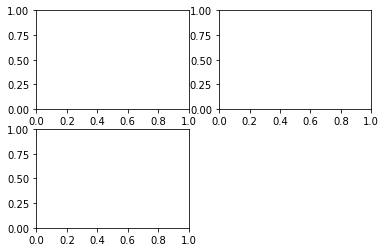

In [2]:
# cоздаем объект Figure
fig = plt.figure()

# создаем подграфики (нумерация слева направо и сверху вниз)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

Первые два аргумента означают, что `Figure` будет расчерчен в сетку размерами 2x2 (rows \* cols), третий указывает на номер подграфика (num), который должен удовлетворять условию $ {1 \leqslant num \leqslant rows \bullet cols }$

*Способ второй*: автоматическое создание необходимых объектов средствами функции `subplots`

~~поиграйтесь со значениями аргументов~~

Со значением аргументов, передаваемых в функцию, можно ознакомиться в документации

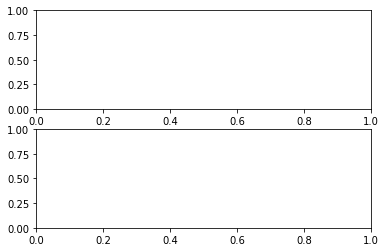

In [3]:
fig, axes = plt.subplots(2, 1)

| Аргумент     | Описание |
|--------------|----------|
| `nrows`      | Число строк в сетке подграфиков |
| `ncols`      | Число столбцов в сетке подграфиков |
| `sharex`     | Все подграфики должны иметь одинаковые риски на оси X | 
| `sharey`     | Все подграфики должны иметь одинаковые риски на оси Y |
| `subplot_kw` | Словарь ключевых слов для создания подграфиков |
| `**fig_kw` | Дополнительные ключевые слова при создании рисунка, например, `plt.subplots(2, 2, figsize=(8,6))` |

## Цвета, маркеры и стили линий

Для рисования графиков используется функция `plot`, которая принимает в качестве аргументов массивы координат X и Y, а также необязательную строку, в которой закодированы цвет и стиль линий. Например, чтобы нарисовать график зависимости y от x зеленой штриховой линией нужно передать методу `plot` строку *'g--'*. 

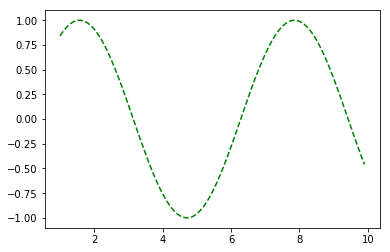

In [4]:
from math import sin

# Опишем массив абсцисс
x_data = np.arange(1, 10, 0.1)
 
# Опишем массив ординат
y_data = [sin(x) for x in x_data]
 
plt.plot(x_data, y_data, 'g--')


Показательно, что в примере создание подграфика произошло неявно, подумайте об этом

Существуют альтернативные способы задания стиля линии

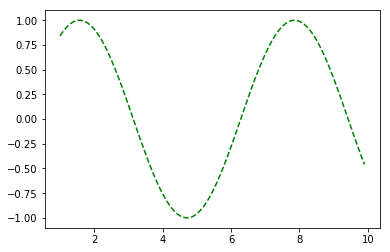

In [5]:
plt.plot(x_data, y_data, linestyle='--', color='g')

*Любой оттенок цвета можно представить своим RGB-значением, например #00FF00, попробуйте подставить его в качестве цвета*

Линейные графики могут быть также снабжены маркерами, обозначающими точки, по которым построен график. Посколько `matplotlib` создает непрерывный линейный график, производя интерполяцию между точками, иногда неясно, где же находятся исходные точки. Маркер можно задать в строке стиля: сначала цвет, потом **тип маркера** и в конце стиль линии:

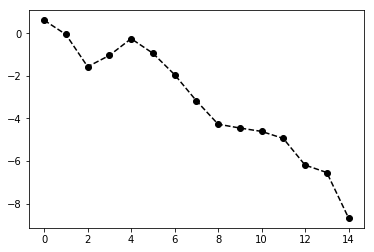

In [6]:
plt.plot(np.random.randn(15).cumsum(), 'ko--')

То же самое можно записать неявно

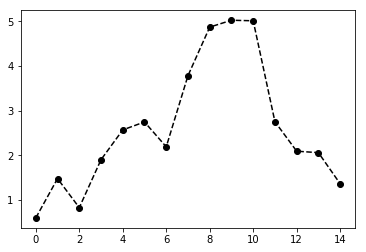

In [7]:
plt.plot(np.random.randn(15).cumsum(),
         color='k', linestyle='dashed', marker='o')

По умолчанию на линейных графиках соседние точки соединяются отрезками прямой, т.е. производится *линейная интерполяция*. Параметр `drawstyle` позволяет изменить этот режим:

In [9]:
# Массив данных одинаковый для двух графиков
data = np.random.randn(20).cumsum()

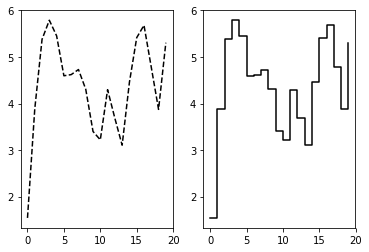

In [10]:
# Создаем два подграфика
# Массив данных одинаковый для двух графиков
data = np.random.randn(20).cumsum()
fig, axes = plt.subplots(1, 2)
 
# Линейная интерполяция в левом 
axes[0].plot(data, 'k--')
 
# Режим steps-post в правом
axes[1].plot(data, 'k-', drawstyle='steps-post')

## Риски, метки и надписи

### Задание названий графика, названия осей, рисок и их меток

Чтобы проиллюстрировать оформление осей, создадим простой рисунок и в нем график случайного блуждания:

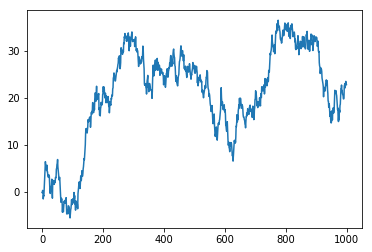

In [11]:
# создадим фигуру с пографиком
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
 
# cumsum суммирует элементы массива с накоплением
ax.plot(np.random.randn(1000).cumsum())


Покажем, как можно сделать ось X красивее:

Text(0.5,0,'Stages')

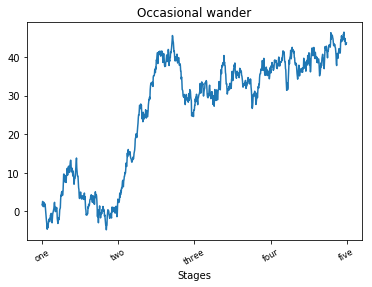

In [12]:
# создадим фигуру с пографиком
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
 
# cumsum суммирует элементы массива с накоплением
ax.plot(np.random.randn(1000).cumsum())
 
# Заголовок подграфика
ax.set_title('Occasional wander')
 
# Изменяем риски оси X
 
# set_xticks указывает, где в пределах диапазона ставить риски
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
 
# Указываем, как подписать риски. По умолчанию стоят числа
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                          rotation=30, fontsize='small')
# Подписываем ось
ax.set_xlabel('Stages')


Стоит отметить, что для изменения рисок оси Y нужно сделать то же самое с заменой x на y.

### Добавление пояснительных надписей

Пояснительная надпись – ещё один важный элемент оформления графика. Добавить ее можно двумя способами. В любом случае, потребуется передать аргумент `label` при добавлении каждого нового графика:

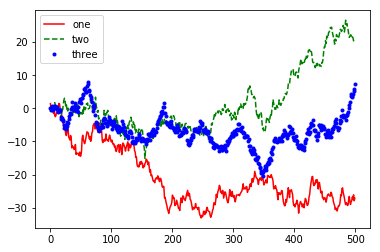

In [13]:
fig, ax = plt.subplots(1, 1)

# Изобразим три графика случайных блужданий
ax.plot(np.random.randn(500).cumsum(), 'r', label='one')
ax.plot(np.random.randn(500).cumsum(), 'g--', label='two')
ax.plot(np.random.randn(500).cumsum(), 'b.', label='three')
 
# Добавляем "легенду" графика
plt.legend(loc='best')

# Альтернативный способ
# ax.legend(loc='best')


Параметр `loc` говорит, где поместить надпись. Если в контексте задачи местоположение неважно, то следует задать значение *'best'*, потому что тогда место будет выбрано так, чтобы не загораживать график, если это возможно. Чтобы исключить из надписи один или несколько элементов, не задавайте параметр `label` вовсе или задайте параметр значением *\_\_nolegend\_\_*.

## Аннотации и рисование в подграфике

Помимо стандартных типов графиков разрешается наносить на график свои аннотации, которые могут включать **текст**, **стрелки** и другие фигуры.
Для добавления аннотаций и текста предназначены функции `text`, `arrow` и `annotate`. Функция `text` наносит на график текст, начиная с точки с заданными координатами (x, y). Синтаксис ее вызова для подграфика следующий:

Text(0.2,0.4,'Примерно так это всё выглядит')

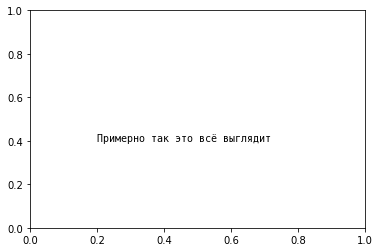

In [14]:
fig, ax = plt.subplots(1, 1)

ax.text(0.2, 0.4, 'Примерно так это всё выглядит', family='monospace', fontsize=10)

В аннотациях могут встречаться текст и стрелки. В качестве примера нарисуем параболу и покажем промежутки монотонности:

Text(-2,55,'Возрастает')

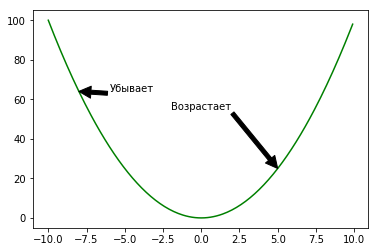

In [16]:
parab_xdata = np.arange(-10, 10, 0.1)
parab_ydata = [x*x for x in parab_xdata]
 
# Рисуем синусоиду
plt.plot(parab_xdata, parab_ydata, 'g')
 
# Выбираем точку на левой ветви
x_less, y_less = parab_xdata[20], parab_ydata[20]
 
# рисуем для нее аннотацию со стрелкой
plt.annotate('Убывает', xy=(x_less, y_less),
             xytext=(x_less+2,y_less),
             arrowprops=dict(facecolor='black'),
             horizontalalignment='left')
 
# Правая ветвь
x_great, y_great = parab_xdata[150], parab_ydata[150]
 
# Аналогично для неё
plt.annotate('Возрастает', xy=(x_great, y_great),
             xytext=(x_great-7, y_great+30),
             arrowprops=dict(facecolor='black'),
             horizontalalignment='left')


Для рисования фигур требуется больше усилий. В *matplotlib* имеются объекты, реализующие **рисование многих стандартных фигур**. Такие объекты называются патчами (*patches*). Часть из них, например `Rectangle` и `Circle` находятся в модуле `matplotlib.pyplot`, а весь набор – в модуле `matplotlib.patches`.

Чтобы поместить на график фигуру, мы создаем объект патча и добавляем его в подграфик, передав объект в метод `ax.add_patch()`

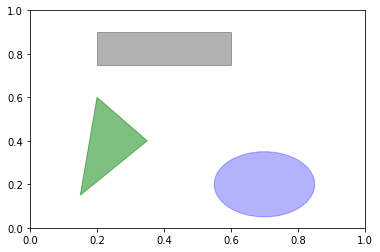

In [17]:
fig, ax = plt.subplots(1, 1)
 
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)

# Круг, который не круг :) Аккуратнее с масштабом осей
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)
 
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)


## Сохранение графиков в файле

Активный рисунок можно сохранить в файле методом `plt.savefig`. Этот метод эквивалентен методу экземпляра рисунка `savefig`. Например, чтобы сохранить рисунок в формате *SVG*, достаточно указать только имя файла

In [18]:
plt.savefig('figpath.svg')

<Figure size 432x288 with 0 Axes>

Формат выводится из расширения имени файла. Если бы мы задали файл с расширением .pdf, то рисунок был бы сохранен в формате PDF. Метод также поддерживает следующие параметры:

| Аргумент | Описание |
|----------|----------|
| `fname` | Строка, содержащая путь к файлу или похожий на файл объект Python. Формат рисунка определяется по расширению имени файла. |
| `dpi` | Разрешение рисунка в точках на дюйм. *По умолчанию 100.* |
| `facecolor`, `edgecolor` | Цвет фона рисунка вне области, занятой подграфиками. *По умолчанию ‘w’ (белый)*. |
| `format` | Явно заданный формат файла (*‘png’*, *‘pdf’*, *‘svg’* и другие) |
| `bbox_inches` | Какую часть рисунка сохранять. Если задано значение *‘tight’*, то метод пытается обрезать все пустой место вокруг рисунка. |

# Функции построения графиков в pandas

## Структуры данных в pandas

### Объект Series

*Series* – одномерный похожий на массив объект, содержащий массив данных *(любого типа, поддерживаемого NumPy)* и ассоциированный с ним массив меток, который называется индексом. Простейший объект Series состоит только из массива данных.

В строковом представлении Series, отображаемом в интерактивном режиме, индекс находится слева, а значения справа. Поскольку мы не задали индекс для дан¬ных, то по умолчанию pandas индексирует элементы своего объекта с нуля. Имея объект Series, получить представление самого массива и его индекса можно с помощью атрибутов `values` и `index` соответственно

In [19]:
from pandas import Series

# Создаем объект Series
fib_series = Series([1, 1, 2, 3, 5])

# Выведем строковое представление объекта
print(fib_series)

0    1
1    1
2    2
3    3
4    5
dtype: int64


К полям объекта можно обращаться так:

In [20]:
print('Поле values следующего типа: ', type(fib_series.values))
print('Поле values содержит следующие значения: ', fib_series.values)

Поле values следующего типа:  <class 'numpy.ndarray'>
Поле values содержит следующие значения:  [1 1 2 3 5]


Отдельно можно узнать, как *pandas* **проиндексировал** входные данные 

In [21]:
print('Индексы: ', fib_series.index)

Индексы:  RangeIndex(start=0, stop=5, step=1)


В конструкторе объекта можно задать необходимые в контексте задачи индексы:

In [22]:
# Крупные города России по населению. Значение соответствует населению в тысячах людей
cities = Series([12380, 5281, 1602, 1455],
                index=['Moscow', 'St. Petersburg', 'Novosibirsk', 'Ekaterinburg'])
 
print(cities)


Moscow            12380
St. Petersburg     5281
Novosibirsk        1602
Ekaterinburg       1455
dtype: int64


Стоит учитывать, что *Series* в поле `values` хранит объект класса из библиотеки *NumPy*. Этот факт добавляет огромное количество функционала, например, **фильтрация элементов**.

In [23]:
# Создаём объект с различными целыми числами
series_object = Series([-1, 2, 3, -4, 5, -7])
 
# Выводим только положительные
print(series_object[series_object > 0])

1    2
2    3
4    5
dtype: int64


Как видно из примера, индексация элементов сохранилась старая

### Объект DataFrame

*DataFrame* представляет собой табличную структуру данных, состоящую из упорядоченной коллекции столбцов, причем типы значений (числовой, строковый, булев и т.д.) в разных столбцах могут различаться. В объекте *DataFrame* хранятся **два индекса**: по строкам и по столбцам. Можно считать, что это словарь объектов Series. Внутри объекта *DataFrame* данные хранятся в виде одного или нескольких двумерных блоков, а не в виде списка, словаря или еще какой-нибудь коллекции одномерных массивов.

Есть много способов сконструировать объект DataFrame, одни из самых распространенных – на основе словаря списков одинаковой длины или массивов *NumPy*:

In [26]:
from pandas import DataFrame
 
# Перечислим набор питомцев
sweethearts = {'name': ['Rocky', 'Zeus', 'Cooper', 'Dolly', 'Vanilla'],
               'type': ['Dog', 'Dog', 'Dog', 'Cat', 'Cat'],
               'amount of feed': [250, 200, 200, 150, 175],
               'is pretty?': [True, True, True, True, True]}
 
# Создадим объект фрейма. Индексы можно указать самим, как в случае с Series
frame = DataFrame(sweethearts, index=[101, 102, 103, 104, 105])

print(frame)


        name type  amount of feed  is pretty?
101    Rocky  Dog             250        True
102     Zeus  Dog             200        True
103   Cooper  Dog             200        True
104    Dolly  Cat             150        True
105  Vanilla  Cat             175        True


Существует возможность задать последовательность отображения столбцов явно

In [27]:
print(DataFrame(sweethearts, columns=['amount of feed', 'type', 'name', 'is pretty?']))

   amount of feed type     name  is pretty?
0             250  Dog    Rocky        True
1             200  Dog     Zeus        True
2             200  Dog   Cooper        True
3             150  Cat    Dolly        True
4             175  Cat  Vanilla        True


Отдельный столбец можно извлечь, используя нотацию словарей или с помощью атрибута

In [29]:
frame['name']

101      Rocky
102       Zeus
103     Cooper
104      Dolly
105    Vanilla
Name: name, dtype: object

In [31]:
frame.type

101    Dog
102    Dog
103    Dog
104    Cat
105    Cat
Name: type, dtype: object

### Индексные объекты

В индексных объектах *pandas* хранятся метки вдоль осей и прочие метаданные, например, имена осей. Любой массив или иная последовательность меток, указанная при конструировании *Series* или *DataFrame*, **преобразуется в объект *Index***. Ниже показан пример работы с таким объектом

In [33]:
obj = Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
 
# Собственно, индексный объект
index = obj.index
 
print('Можно брать срезы ', index[2:-1:])
 
try:
    index[2] = 'f'
    print('Если это сообщение вывелось, то все плохо')
except:
    print('Индексные объекты нельзя изменять')


Можно брать срезы  Index(['c', 'd'], dtype='object')
Индексные объекты нельзя изменять


Как видно из примера выше, объекты индекса неизменяемы. Это важно для того, чтобы несколько структур данных могли совместно использовать один и тот же индексный объект, не опасаясь его повредить.

Существуют уже готовые решения индексации, которые представлены в таблице ниже

| Тип      | Примечания |
|----------|----------|
| `Index` | Наиболее общий объект, представляющий оси в массиве NumPy, состоящем из объектов Python |
| `Int64Index` | Специализированный индекс для целых значений |
| `MultiIndex` | *Иерархический* индекс, представляющий несколько уровней индексирования на одной оси. Аналог массива кортежей. |
| `DatetimeIndex` | Хранит временные метки с наносекундной точностью (тип данных NumPy datetime64) |
| `PeriodIndex` | Специализированный индекс для данных о периодах времени |

У любого объекта *Index* есть ряд свойств и методов для удобства работы. Они перечислены в таблице

| Метод | Описание |
|----------|----------|
| `append` | Конкатенирует с дополнительными индексными объектами, порождая новый объект |
| `diff` | Вычисляет теоретико-множественную разность, представляя её в виде индексного объекта |
| `intersection` | Теоретико-множественное пересечение |
| `union` | Вычисляет теоретико-множественное объединение |
| `isin` | Вычисляет булев массив, показывающий, содержится ли каждое значение индекса в переданной коллекции |
| `delete` | Вычисляет новый индексный объект, получающийся после удаления элемента с индексом `i` |
| `drop` | Вычисляет новый объект, после удаления переданных значений  |
| `insert` | Возвращает новый объект, полученный после вставки элемента в позицию с индексом `i` |
| `is_monotonic` | Возвращает `True`, если последовательность монотонно неубывающая |
| `is_unique` | Возвращает `True`, если в индексе нет повторяющихся значений |
| `unique` | Возвращает массив уникальных значений в индексе |

## Построение графиков

### Линейные графики

У объектов Series и DataFrame имеется метод `plot`, который умеет строить графики разных типов. По умолчанию он строит линейный график

AxesSubplot(0.125,0.125;0.775x0.755)


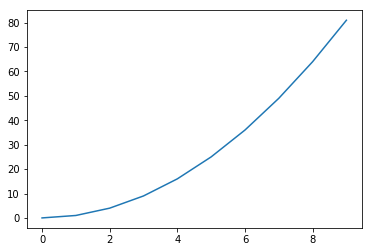

In [35]:
# Создаем объект pandas.Series
parabola = Series([x ** 2 for x in range(10)])
 
# Выводим график
print(parabola.plot())

Индекс объекта Series передаётся matplotlib для нанесения рисок на ось X, но это можео отключить, задав параметр `use_index=false`. Риски и диапазон значений на координатных осях можно настраивать с помощью специальных параметров. Эти и другие параметры описаны ниже.

| Аргумент | Описание |
|----------|----------|
| `label` | Метка для пояснительной надписи на графике |
| `ax` | Объект подграфика matplotlib, внутри которого строить график. Если параметр не задан, используется активный график |
| `style` | Строка стиля, которая передается matplotlib |
| `alpha` | Уровень непрозрачности графика от 0 до 1 |
| `kind` | Принимает значения `'line'`, `'bar'`, `'barh'`, `'kde'` |
| `logy` | Использовать логарифмический масштаб по оси Y |
| `use_index` | Брать метки рисок из индекса объекта |
| `rot` | Угол поворота меток рисок (от 0 до 360) |
| `xticks` | Значения рисок на оси X |
| `yticks` | Значения рисок на оси Y |
| `xlim` | Границы по оси X (например, \[0, 10\]) |
| `ylim` | Границы по оси Y |
| `grid` | Отображать координатную сетку (по умолчанию включено) |

Метод `plot` объекта DataFrame строит отдельные графики каждого столбца внутри одного подграфика и автоматически создает пояснительную надпись

AxesSubplot(0.125,0.125;0.775x0.755)


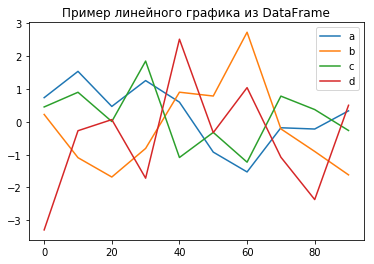

In [37]:
# Генерируем 4 случайных графика
df = DataFrame(np.random.randn(10, 4),
               columns=['a', 'b', 'c', 'd'],
               index=np.arange(0, 100, 10))
 
print(df.plot(title='Пример линейного графика из DataFrame'))

У объектов DataFrame есть ряд параметров, гибко описывающих обработку столбцов. Все они перечислены ниже.

| Аргумент | Описание |
|----------|----------|
| `subplots` | Рисовать график каждого столбца в отдельном подграфике |
| `sharex` | Если `subplots=True`, то совместно использовать ось X, объединяя риски и границы         |
| `sharey` | Если `subplots=True`, то совместно использовать ось Y         |
| `figsize` | Размеры создаваемого рисунка в виде кортежа         |
| `title` | Название графика в виде строки         |
| `legend` | Помещать в подграфик пояснительую надпись         |
| `sort_columns` | Строить графики столбцов в алфавитном порядке; по умолчанию используется существующий порядок столбцов |

### Столбчатые диаграммы

Чтобы строить не линейный график, а столбчатую диаграмму, достаточно в метод `plot()` передать аргумент `kind='bar'`, если столбики должны быть вертикальными, или `kind='barh'`, если горизонтальными. В этом случае индекс Series или DataFrame будет использоваться для нанесения рисок на оси X(bar) или Y(barh).

In [39]:
from collections import Counter
 
#  Произвольный текст
text = 'Visualizing data as bar charts is easy'
 
# Переводим текст в нижний регистр и удалям пробелы
letters = ''.join(text.lower().split())
 
# Считаем частоту встречи каждой буквы
freq_counter=Counter(letters)
 
# Инициализируем объект
word_frequency=Series(list(freq_counter.values()),
                      index=freq_counter.keys())


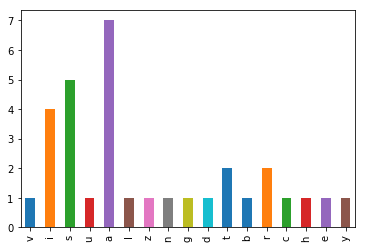

In [41]:
word_frequency.plot(kind='bar')

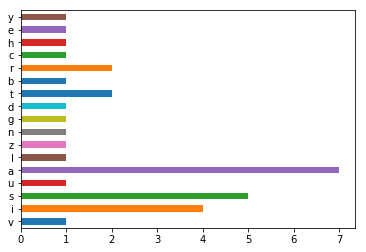

In [43]:
word_frequency.plot(kind='barh')


В случае DataFrame значения из каждой строки объединяются в группы столбиков, расположенные поодаль друг от друга.

In [47]:
# Массив скоростей
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
 
# Массив продолжительностей жизни
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
 
# Массив животных
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
 
# Инициализируем DataFrame
df = DataFrame({'speed': speed,
                'lifespan': lifespan}, index=index)

Строим диаграмму

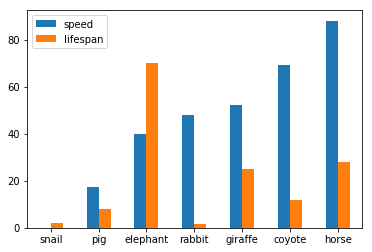

In [48]:
# Так тоже можно строить:)
ax = df.plot.bar(rot=0)

С горизонатальной диаграммой все аналогично. Однако, стоит указать на параметр `stacked`, который работает следующим образом:

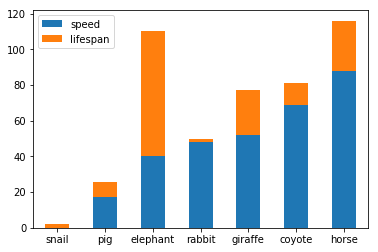

In [50]:
ax = df.plot.bar(rot=0, stacked=True)

### Гистограммы и графики плотности

Гистограмма – это разновидность столбчатой диаграммы, показывающая дискретизированное представление частоты. Результаты измерений распределяются по дискретным интервалам равной ширины, а на гистограмме отображается количество точек в каждом интервале. У объекта Series есть метод `hist()`

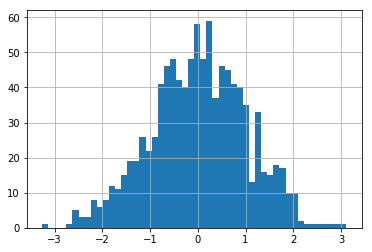

In [55]:
sr = Series(np.random.randn(1000))

# Гистограмма с разбиением на 50 участков
sr.hist(bins=50)

С гистограммой тесно связан график плотности, который строится на основе оценки непрерывного распределения вероятности по результатам случайных экспериментов. Обычно стремятся аппроксимировать это распределение комбинацией ядер, т.е. более простых распределений, например *нормального (гауссова)*. Такие графики называют **графиками ядерной оценки плотности** (*KDE – kernel density estimate*). Вызов метода `plot` со значением параметра `kind` равным *‘kde’* строит такой график. Обычно такой график рисуют вместе с гистограммой

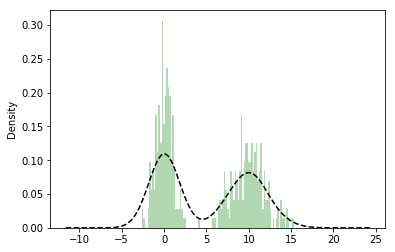

In [57]:
# Генерируем две выборки из нормального распределения
normal1 = np.random.normal(0, 1, size=200)
normal2 = np.random.normal(10, 2, size=200)
 
# Соединяем их в один объект
values = Series(np.concatenate([normal1, normal2]))
 
# Рисуем гистограмму и график плотности
values.hist(bins=100, alpha=0.3, color='g', density=True)
values.plot(kind='kde', style='k--')


### Диаграммы рассеяния

Диаграммы рассеяния – полезный способ исследовать соотношения между двумя одномерными рядами данных. В пакете *matplotlib* есть метод `scatter`, с помощью которого строятся все такого рода графики. Для демонстрации служит следующий пример:

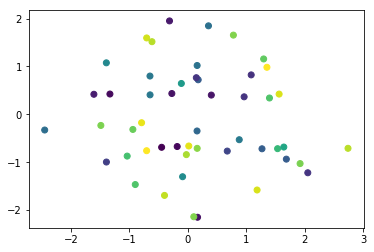

In [60]:
N = 50
 
x = np.random.normal(0, 1, size=N)
y = np.random.normal(0, 1, size=N)
 
colors = np.random.rand(N)
 
plt.scatter(x, y, c=colors)

В анализе данных полезно видеть все диаграммы рассеяния для группы переменных, их называют **матрицей диаграмм рассеяния**. Построение такого графика с нуля очень утомляет, поэтому в `pandas.plotting` имеется функция `scatter_matrix` для построения матрицы на основе объекта *DataFrame*. Она поддерживает также размещение гистограмм или графиков плотности каждой переменной вдоль диагонали

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD2DF6E358>,
      dtype=object)

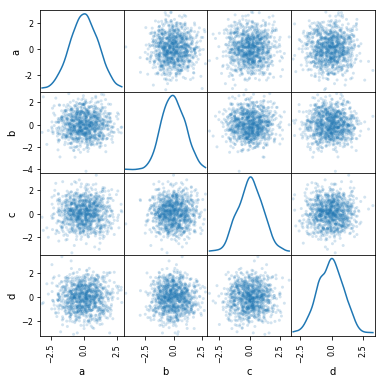

In [62]:
from pandas.plotting import scatter_matrix
 
df = DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
 
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

# Визуализация графовых данных

## NetworkX

In [64]:
import networkx as nx

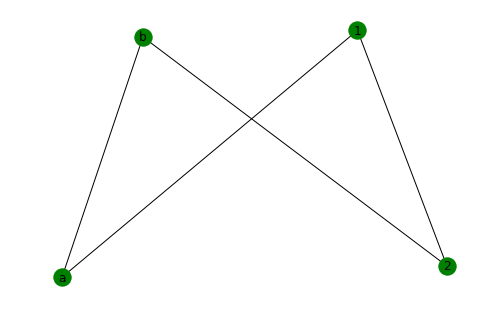

In [66]:
# Создаем граф
G = nx.Graph()
 
# Добавляем вершины 'a', 'b', 1 и 2
G.add_nodes_from(['a', 'b', 1, 2])
 
# Добавляем ребра
G.add_edge('a', 'b')
G.add_edge(2, 1)
 
G.add_edges_from([('a', 1), ('b', 2)])
 
# Доступ к аттрибутам
edge_count = G.number_of_edges() # 4
node_count = G.number_of_nodes() # 4
 
# Рисование
nx.draw(G, with_labels=True, node_color='green')

Так выглядит ориентированный граф:

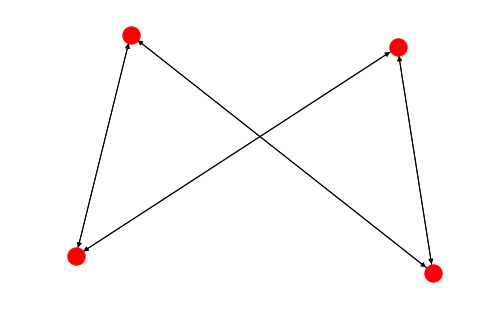

In [67]:
nx.draw(G.to_directed())

Также есть встроенные примеры широко известных графов 

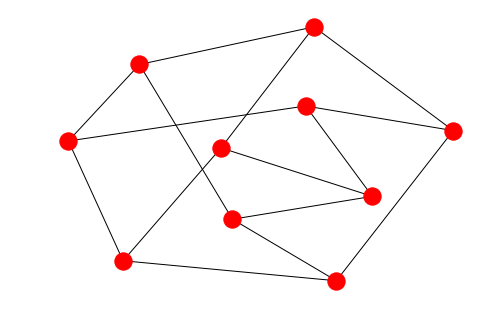

In [69]:
nx.draw(nx.petersen_graph())

## iGraph

Модуль анализа сетей, поставляемый также на R и C/C++. Не входит в стандартную поставку модулей, но процесс установки описан на Python Package Index и на официальном сайте пакета.

In [70]:
from igraph import *
 
# Создаём график
vertices = [i for i in range(7)]
edges = [(0,2),(0,1),(0,3),(1,0),(1,2),
         (1,3),(2,0),(2,1),(2,3),(3,0),
         (3,1),(3,2),(2,4),(4,5),(4,6),
         (5,4),(5,6),(6,4),(6,5)]

Обычная практика для графовых библиотек - наличие класса `Graph`

In [72]:
g = Graph(vertex_attrs={"label":vertices}, edges=edges, directed=True)

Задаём стиль рисования

In [73]:
visual_style = {}
 
# Масштабируем вершины в зависимости от степеней
outdegree = g.outdegree()
visual_style["vertex_size"] = [x/max(outdegree)*4+50 for x in outdegree]
 
# Ограничительная рамка и отступы
visual_style["bbox"] = (600,600)
visual_style["margin"] = 100

Раскрашиваем вершины

In [80]:
# Определяем цвета вершин
colours = ['#fecc5c', '#a31a1c']
 
# Сортируем вершины в зависимости от степени исхода
bins = np.linspace(0, max(outdegree), len(colours))  
digitized_degrees =  np.digitize(outdegree, bins)

# Устанавливаем цвета
g.vs["color"] = [colours[x-1] for x in digitized_degrees]

Махинации с ребрами

In [81]:
# Также красим ребра
for ind, color in enumerate(g.vs["color"]):
        edges = g.es.select(_source=ind)
        edges["color"] = [color]

# Запрещаем кривые ребра
visual_style["edge_curved"] = False

Определяем связности

In [82]:
communities = g.community_edge_betweenness(directed=True)
clusters = communities.as_clustering()

Устанавливаем вес ребер

In [83]:
weights = {v: len(c) for c in clusters for v in c}
g.es["weight"] = [weights[e.tuple[0]] + weights[e.tuple[1]] for e in g.es]

Выводим граф

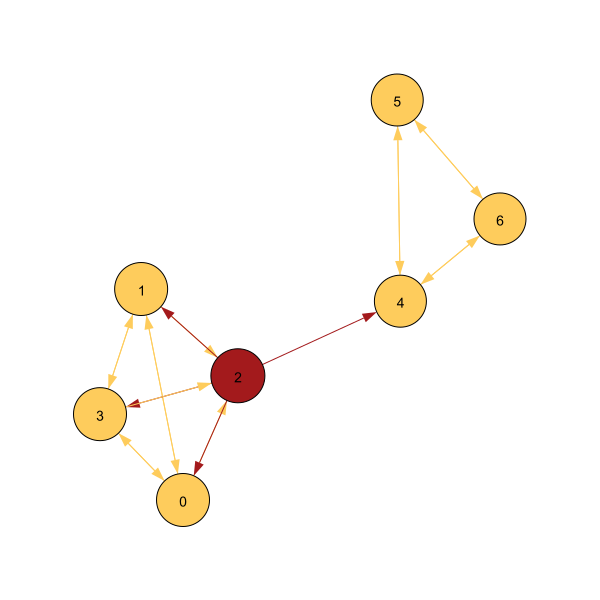

In [85]:
# Выбираем расположение
N = len(vertices)
visual_style["layout"] = g.layout_fruchterman_reingold(weights=g.es["weight"],maxiter=1000,
area=N**3, repulserad=N**3)
 
# Выводим граф
plot(g, **visual_style)

## Graph-tool

Модуль *graph_tool* предоставляет класс `Graph` и несколько алгоритмов, работы с ним. Реализация этого класса и большинства алгоритмов написаны на C++ с использованием библиотеки **Boost Graph**, для повышения производительности.

Для непосредственной визуализации можно использовать функцию `graph_draw()`:

In [ ]:
from graph_tool.all import * 

# создание объекта графа
g = Graph()

# добавление вершин в граф
v0 = g.add_vertex()
v1 = g.add_vertex()
v2 = g.add_vertex()
v3 = g.add_vertex()

# добавление ребер в граф
e1 = g.add_edge(v0, v1)
e2 = g.add_edge(v1, v2)
e3 = g.add_edge(v1, v3)
e4 = g.add_edge(v2, v0)
e5 = g.add_edge(v2, v3)

graph_draw(g, vertex_text=g.vertex_index, vertex_font_size=18, output_size=(200, 200))

По умолчанию конструктор класса создает ориентированный граф. Для создания неориентированного графа необходимо присвоить значение `False` атрибуту `directed`.

Библиотека *Graph-tool* представляет удобный инструмент для работы с **нагруженными графами**. Следует использовать метод `new_edge_property()` для того, чтобы приписать ребрам некоторое свойство, например, вес

In [ ]:
import numpy as np
from graph_tool.all import *
W = np.matrix([
     [0.0, 0.0, 8.5],
     [1.3, 0.0, 0.0],
     [0.0, 2.0, 0.0]]) 
num_vertices = W.shape[0] # количество вершин
g = Graph(directed=True)
g.add_vertex(num_vertices)
label_weight = g.new_edge_property('string')
for i in range(0, num_vertices):
    for j in range(0, num_vertices):
    if W[i,j] != 0:
        e = g.add_edge(i, j) # добавление ребер
        label_weight[e] = str(W[i,j]) # метки ребер
graph_draw(g,  vertex_text=g.vertex_index,  edge_text=label_weight, vertex_font_size=20, edge_font_size = 20, output_size = (300, 300))